In [317]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle5 as pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#### Task 2.2.1 - How to Re-sample the Data

In [318]:
train_sets_X = []
train_sets_Y = []
my_data = []
with open('../data/train.pkl', 'rb') as f:
    data = pickle.load(f)
    np.random.shuffle(data)
    my_data = data
    # divide data into 16 sets
    for i in range(16):
        my_arr = data[i*50:(i+1)*50]
        my_arr = my_arr[my_arr[:,0].argsort()]
        train_sets_X.append(my_arr[:,0])
        train_sets_Y.append(my_arr[:,1])

train_sets_X = np.array(train_sets_X)
train_sets_Y = np.array(train_sets_Y)
    

In [319]:
test_sets_X = []
test_sets_Y = []
test_dict = {}
with open('../data/test.pkl', 'rb') as f:
    data = pickle.load(f)
    test_sets_X = data[:,0]
    test_sets_Y = data[:,1]

for i in range(len(test_sets_X)):
    test_dict[test_sets_X[i]] = test_sets_Y[i]

Visualizing training data

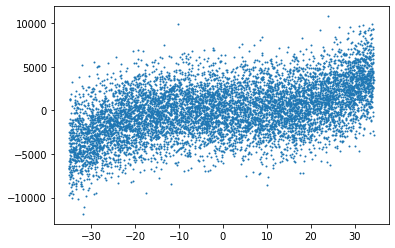

In [320]:
plt.scatter(my_data[:,0], my_data[:,1], s=1)

#### Task 2.2.2 - Calculating Bias and Variance

In [321]:
def regression(x, y, degree):
    '''
    Computes prediction of y given x and degree

    Args:
        x: input data
        y: output data
        degree: degree of polynomial

    Returns:
        y_predicted: predicted output
    '''
    # PolynomialFeatures part
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    train_sets_X_poly = []
    for row in x:
        row = row.reshape(-1,1)
        new_row = poly.fit_transform(row)
        train_sets_X_poly.append(new_row)
    train_sets_X_poly = np.array(train_sets_X_poly)

    # LinearRegression part
    reg = LinearRegression()
    coefs = []
    intercepts = []
    y_predicted = []
    for i in range(len(train_sets_X_poly)):
        reg.fit(train_sets_X_poly[i], y[i])
        y_predicted.append(reg.predict(train_sets_X_poly[i]))
        coefs.append(reg.coef_)
        intercepts.append(reg.intercept_)
        
    return y_predicted, coefs, intercepts

In [322]:
poly_y = []
poly_coefs = []
poly_intercepts = []
for i in range(1, 16):
    y_predicted, coefs, intercepts = regression(train_sets_X, train_sets_Y, i)
    poly_y.append(y_predicted)
    poly_coefs.append(coefs)
    poly_intercepts.append(intercepts)

# UNCOMENT THIS LATER
# plt.figure(figsize=(25,200))
# for i in range(15):
#     for j in range(16):
#         plt.subplot(60,4,16*i + j+1)
#         plt.scatter(train_sets_X[j], train_sets_Y[j], s=1)
#         plt.ylim(-10000, 10000)
#         plt.plot(train_sets_X[j], poly_y[i][j], color='red')
#         plt.title('degree: ' + str(i+1) + ' set: ' + str(j+1))

In [323]:
# deg1_y = np.array(poly_y[1])
# deg1_coefs = np.array(poly_coefs[1])
# deg1_intercepts = np.array(poly_intercepts[1])
# deg1_coefs
# bias = []
# for i in range(16):
#     bs = 0
#     for j in range(len(test_sets_Y)):
#         bs += test_sets_Y[j] - 
#     bias.append(bs/len(deg1[i]))

# bias

def calc_poly(coefs, x):
    ans = 0
    for i in range(len(coefs)):
        ans += coefs[i] * x**i
    return ans

bias = []
for deg in range(15):
    deg_coefs = np.array(poly_coefs[deg])
    deg_intercepts = np.array(poly_intercepts[deg])
    deg_bias = []
    avg_coef = np.mean(deg_coefs, axis=0)
    avg_intercept = np.mean(deg_intercepts, axis=0)
    for i in range(16):
        bs = 0
        for j in range(len(test_sets_Y)):
            bs += calc_poly(avg_coef, test_sets_X[j]) + avg_intercept - test_sets_Y[j]
        deg_bias.append(bs/len(test_sets_Y))
    bias.append(deg_bias)

bias = np.array(bias)

variance = []
for deg in range(15):
    deg_coefs = np.array(poly_coefs[deg])
    deg_intercepts = np.array(poly_intercepts[deg])
    deg_variance = []
    avg_coef = np.mean(deg_coefs, axis=0)
    avg_intercept = np.mean(deg_intercepts, axis=0)
    for i in range(16):
        var = 0
        for j in range(len(test_sets_X)):
            var += (calc_poly(deg_coefs[i] - avg_coef, test_sets_X[j]) + (deg_intercepts[i] - avg_intercept))**2
        deg_variance.append(var/len(test_sets_Y))
    variance.append(deg_variance)

variance = np.array(variance)

# bias.shape
print(bias, variance)

[[408.48999165 408.48999165 408.48999165 408.48999165 408.48999165
  408.48999165 408.48999165 408.48999165 408.48999165 408.48999165
  408.48999165 408.48999165 408.48999165 408.48999165 408.48999165
  408.48999165]
 [355.52952767 355.52952767 355.52952767 355.52952767 355.52952767
  355.52952767 355.52952767 355.52952767 355.52952767 355.52952767
  355.52952767 355.52952767 355.52952767 355.52952767 355.52952767
  355.52952767]
 [325.10668095 325.10668095 325.10668095 325.10668095 325.10668095
  325.10668095 325.10668095 325.10668095 325.10668095 325.10668095
  325.10668095 325.10668095 325.10668095 325.10668095 325.10668095
  325.10668095]
 [497.20543375 497.20543375 497.20543375 497.20543375 497.20543375
  497.20543375 497.20543375 497.20543375 497.20543375 497.20543375
  497.20543375 497.20543375 497.20543375 497.20543375 497.20543375
  497.20543375]
 [471.80847181 471.80847181 471.80847181 471.80847181 471.80847181
  471.80847181 471.80847181 471.80847181 471.80847181 471.8084718

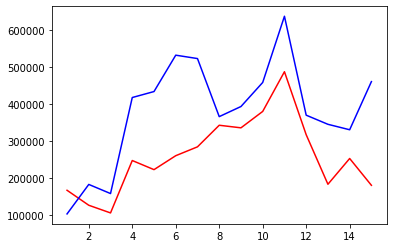

In [324]:
avg_bias = np.mean(bias, axis=1)
avg_variance = np.mean(variance, axis=1)

plt.plot(range(1,16), avg_bias**2, color='red')
plt.plot(range(1,16), avg_variance, color='blue')

# Iske aage sab kachra hai

In [325]:
bias = []
for i in range(15):
    avg = np.sum(poly_y[i], axis=0)/16 # average y_predicted for each set
    # print(avg)
    y_avg = np.sum(train_sets_Y, axis=0)/16 
    # print(y_avg)
    bias.append(np.sum(avg - y_avg)/50)
bias = np.array(bias)
print(bias)


[-7.27595761e-14  4.54747351e-14  1.81898940e-14  5.45696821e-14
  5.00222086e-14 -1.63709046e-13  2.41016096e-13  2.08274287e-12
 -1.74622983e-12 -8.01719580e-12  1.73167791e-11 -1.65528036e-12
 -3.80487108e-11  1.74259185e-11  1.69029590e-11]


In [326]:
variance = []
var_arr = []
for i in range(15):
    avg = np.sum(poly_y[i], axis=0)/16
    s_arr = []
    for j in range(16):
        s_arr.append(poly_y[i][j] - avg)
    s_arr = np.array(s_arr)
    var_arr.append(np.sum(s_arr**2, axis=0)/50)

variance = np.sum(np.array(var_arr), axis=1)/16

variance

array([ 296843.33068762,  363004.91178486,  491925.56362743,
        613254.10543844,  786013.70484582,  912075.34493321,
       1016137.27114401, 1121801.34298887, 1186819.6060453 ,
       1324332.03278321, 1314084.67409228, 1352292.67357839,
       1256157.77287323, 1263218.18025382, 1240341.2592859 ])

In [327]:
np.array(poly_y).shape

(15, 16, 50)

In [328]:
test_sets_Y.shape

(80,)

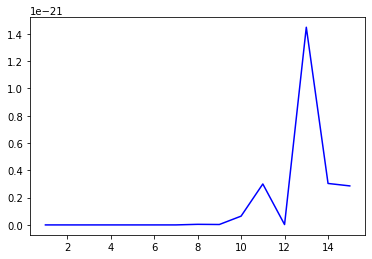

In [329]:
# plt.plot(range(1,16), variance, color='red')
plt.plot(range(1,16), bias**2, color='blue')

In [330]:
my_poly = PolynomialFeatures(degree=3, include_bias=False)
my_poly.set_params()
my_poly.fit_transform(np.array([[1]]))

array([[1., 1., 1.]])